In [1]:
import pandas as pd
import pickle

# Load cleaned historical data
df_historical_data = pd.read_csv("data/can_matches_cleaned_final.csv")
print(f"Loaded {len(df_historical_data)} historical matches")
df_historical_data.head()

Loaded 736 historical matches


,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
0,Cameroun,Kenya,1972,2,1,3
1,Mali,Togo,1972,3,3,6
2,Mali,Kenya,1972,1,1,2
3,Cameroun,Togo,1972,2,0,2
4,Togo,Kenya,1972,1,1,2


## Calculate team_strength

In [5]:
df_home = df_historical_data[['HomeTeam', 'HomeGoals', 'AwayGoals']]
df_away = df_historical_data[['AwayTeam', 'HomeGoals', 'AwayGoals']]

df_home = df_home.rename(columns={'HomeTeam':'Team', 'HomeGoals': 'GoalsScored', 'AwayGoals': 'GoalsConceded'})
df_away = df_away.rename(columns={'AwayTeam':'Team', 'HomeGoals': 'GoalsConceded', 'AwayGoals': 'GoalsScored'})

df_team_strength = pd.concat([df_home, df_away], ignore_index=True).groupby(['Team']).mean()
print(df_team_strength)

                    GoalsScored  GoalsConceded
Team                                          
Afrique du Sud         1.100000       0.960000
Algérie                1.194805       1.129870
Angola                 1.258065       1.387097
Botswana               0.666667       3.000000
Burkina Faso           1.000000       1.408163
Burundi                0.000000       1.333333
Bénin                  0.500000       1.714286
Cameroun               1.483516       0.923077
Cap-Vert               0.875000       0.750000
Comores                1.000000       1.750000
Congo                  1.086957       1.391304
Cote d'ivoire          1.000000       1.666667
Côte d'Ivoire          1.377778       0.966667
Gabon                  0.960000       1.200000
Gambie                 0.750000       1.250000
Ghana                  1.157303       0.842697
Guinée                 1.244898       1.326531
Guinée équatoriale     1.052632       0.947368
Guinée-Bissau          0.333333       1.583333
Haute-Volta  

## Sample Stats

In [6]:
# Display sample team stats
print("Maroc:")
print(df_team_strength.loc['Maroc'])

print("\nCaméroun:")
print(df_team_strength.loc['Cameroun'])

print("\nSenégal:")
print(df_team_strength.loc['Sénégal'])

Maroc:
GoalsScored      1.175676
GoalsConceded    0.891892
Name: Maroc, dtype: float64

Caméroun:
GoalsScored      1.483516
GoalsConceded    0.923077
Name: Cameroun, dtype: float64

Senégal:
GoalsScored      1.184615
GoalsConceded    0.784615
Name: Sénégal, dtype: float64


## Visualize Team Strength

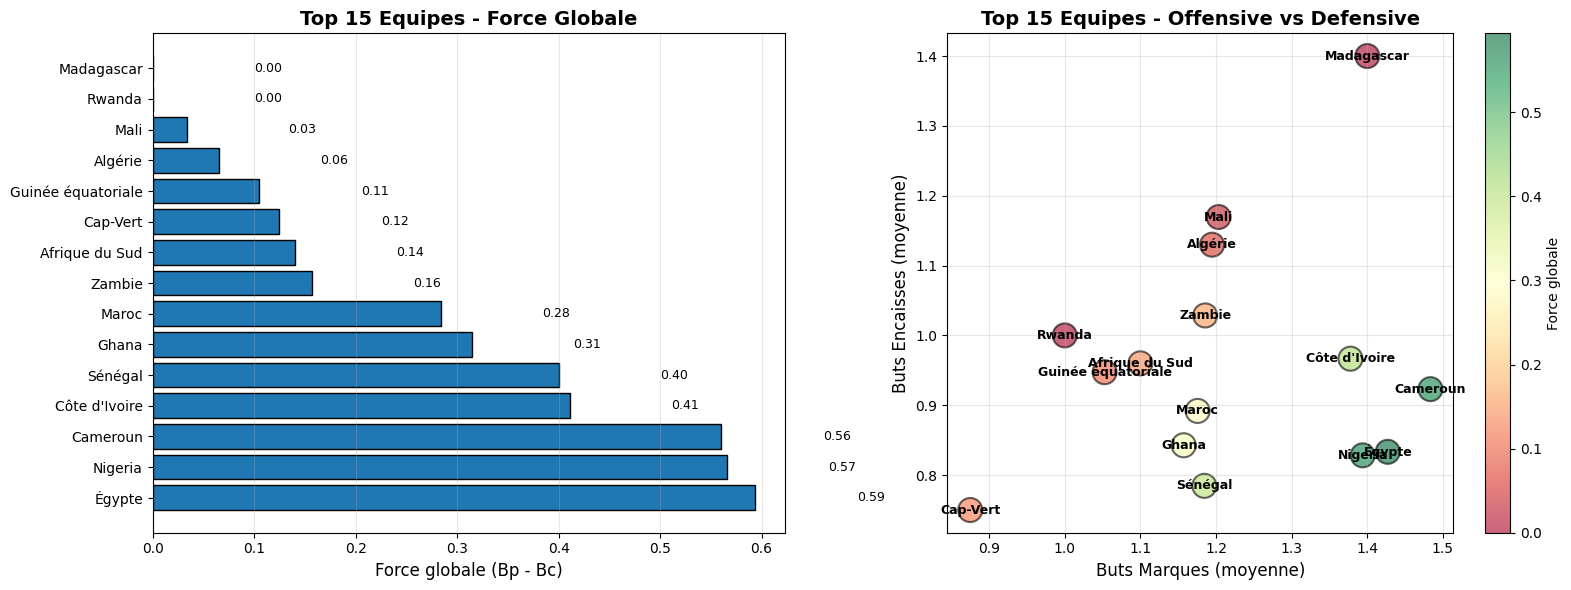

Graphique sauvegarde: images/team_strength_analysis.png

Top 5 Equipes les plus fortes:
               GoalsScored  GoalsConceded     Force
Team                                               
Égypte            1.427083       0.833333  0.593750
Nigeria           1.393939       0.828283  0.565657
Cameroun          1.483516       0.923077  0.560440
Côte d'Ivoire     1.377778       0.966667  0.411111
Sénégal           1.184615       0.784615  0.400000


In [10]:
import matplotlib.pyplot as plt
import os

# Creer le dossier images s'il n'existe pas
os.makedirs('images', exist_ok=True)

# Calculer la force globale de chaque equipe (buts marques - buts encaisses)
df_team_strength['Force'] = df_team_strength['GoalsScored'] - df_team_strength['GoalsConceded']
df_team_strength_sorted = df_team_strength.sort_values('Force', ascending=False)

# Top 15 equipes
top_15 = df_team_strength_sorted.head(15)

# Creer la figure avec 2 sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1: Force globale (buts marques - buts encaisses)
axes[0].barh(range(len(top_15)), top_15['Force'].values, color='#1f77b4', edgecolor='black')
axes[0].set_yticks(range(len(top_15)))
axes[0].set_yticklabels(top_15.index)
axes[0].set_xlabel('Force globale (Bp - Bc)', fontsize=12)
axes[0].set_title('Top 15 Equipes - Force Globale', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, v in enumerate(top_15['Force'].values):
    axes[0].text(v + 0.1, i, f'{v:.2f}', va='center', fontsize=9)

# Graphique 2: Buts marques vs Buts encaisses (scatter)
scatter = axes[1].scatter(top_15['GoalsScored'], top_15['GoalsConceded'], 
                         s=300, alpha=0.6, c=top_15['Force'].values, 
                         cmap='RdYlGn', edgecolor='black', linewidth=1.5)

# Ajouter les labels des equipes
for team_name, (x, y) in zip(top_15.index, zip(top_15['GoalsScored'], top_15['GoalsConceded'])):
    axes[1].annotate(team_name, (x, y), fontsize=9, ha='center', va='center', fontweight='bold')

axes[1].set_xlabel('Buts Marques (moyenne)', fontsize=12)
axes[1].set_ylabel('Buts Encaisses (moyenne)', fontsize=12)
axes[1].set_title('Top 15 Equipes - Offensive vs Defensive', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

# Ajouter une barre de couleur
cbar = plt.colorbar(scatter, ax=axes[1])
cbar.set_label('Force globale', fontsize=10)

plt.tight_layout()
plt.savefig('images/team_strength_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Graphique sauvegarde: images/team_strength_analysis.png")
print(f"\nTop 5 Equipes les plus fortes:")
print(df_team_strength_sorted[['GoalsScored', 'GoalsConceded', 'Force']].head(5))

## Save Team Strength Data

In [11]:
# Save team strength for use in predictions
with open('data/team_strength.pkl', 'wb') as f:
    pickle.dump(df_team_strength, f)

print("✓ Saved: data/team_strength.pkl")
print(f"✓ Team strength data ready for {len(df_team_strength)} teams")

✓ Saved: data/team_strength.pkl
✓ Team strength data ready for 47 teams
